In [429]:
import numpy as np
import math
from matplotlib import pyplot as plt
eps = eps = 10e-30

In [125]:
def plot_k_distributions(P_ml, K):
    for i in range(0,K):
        y = P_ml[:,i]
        plt.figure()
        plt.imshow(np.reshape(y, (8,8)),
                   interpolation="None",
                   cmap='gray')
        plt.axis('off')

In [420]:
def mix_multi_bern(P, X):
    "P: KxDxN matrix of probabilities for K distributions and D variables"
    "x: vector of D variables"

    term1 = np.multiply(X, np.log(np.maximum(P,eps))) 
    term2 = np.multiply(1-X, np.log(np.maximum((1-P),eps)))  
    bern = term1 + term2
    
    return np.e**bern

In [411]:
def responsibility(pi, P, X):

    "pi: vector of length Kx1"
    "P: KxDxN matrix of probabilities"
    "x: data, DxN"
    "returns matrix of responsibilities: NxK"

    term1 = np.log(np.maximum(pi, eps))
    
    term2 = np.log(np.maximum(np.prod(mix_multi_bern(P, X), axis=1), eps))
    
    term3 = log_joint(X, P, pi)
    
    log_r = term1 + term2 - term3
    
    r = np.e**log_r
    
    return r

In [402]:
def log_joint(X, P, pi):
    
    bern = mix_multi_bern(P, X)
    prod_bern = np.e**(np.sum(np.log(bern), axis=1))
    joint = np.sum(np.multiply(pi, prod_bern), axis=0)
    
    return np.log(joint)
    

In [403]:
def E_step(pi, P, x):
    return responsibility(pi, P, x)

In [404]:
def M_step(r, P, x):
    "r: responsibilities NxK"
    "pi: vector of length Kx1"
    "P: KxDxN matrix of probabilities"
    "x: data, DxN"
    "returns maximum likelihood P and pi of dimensions: KxD, Kx1"

    numerator_p = np.dot(x, r.transpose())
    
    denominator_p = np.sum(r, axis=1)
    
    P_ML = numerator_p/denominator_p
    
    pi_ML = np.sum(r, axis=1)
    
    return P_ML, pi_ML

In [405]:
def EM(K, X, iterations):
    log_probs = []
    
    N, D = X.shape
    X = X.transpose() #This is the order which we use in our vectorised implementation
    
    np.random.seed(2)
    P = np.random.rand(K,D) #np.full((K,D), 0.6)
    P = np.repeat(P[:, :, np.newaxis], N, axis=2)
    pi = np.random.rand(K,1)
    pi = pi/(np.sum(pi))
    
    assert(pi.shape == (K, 1))
    assert(X.shape == (D, N))
    assert(P.shape == (K, D, N))
    
    sum_log_joint = np.sum(log_joint(X, P, pi))
    print "Initial log-joint-probability: ", sum_log_joint
    log_probs.append(sum_log_joint)
    
    for i in range(0, iterations):
        
        # E STEP
        r = E_step(pi, P, X)
        # M STEP
        P_ml, pi_ml = M_step(r, P, X)
        
        #P_ml is DxK need to broadcast this to KxDxN for next iteration of vectorised implementation
        P = P_ml.transpose()
        P = np.repeat(P[:, :, np.newaxis], N, axis=2)
    
        #Store the values of the log_joint at the end of each iteration
        sum_log_joint = np.sum(log_joint(X, P, pi))
        log_probs.append(sum_log_joint)
    
    print "Final log-joint-probability: ", sum_log_joint

    for i in range(0,8):
        print "image: ", i+1
        print P_ml[i]
        print r.transpose()[i]
        print np.sum(r.transpose()[i])
    return P_ml, pi_ml, log_probs

In [430]:
X = np.loadtxt('binarydigits.txt')
P, pi, log_probs_4 = EM(4, X, 6)

Initial log-joint-probability:  -5506.344846993844
Final log-joint-probability:  -2846.645947952698
image:  1
[1.57089252e-10 1.41639957e-10 6.66666668e-01 8.10659780e-02]
[9.99999306e-01 1.49845206e-20 3.76132805e-20 6.93779579e-07]
0.9999999999999983
image:  2
[0.03125471 0.125      0.93333333 0.10808972]
[3.95903726e-07 1.62150146e-15 4.07019957e-15 9.99999604e-01]
1.0000000000000133
image:  3
[0.09376723 0.4375     0.66666667 0.2432005 ]
[9.99999711e-01 1.69775368e-17 4.26160350e-17 2.89338881e-07]
0.9999999999999947
image:  4
[0.31256429 0.5625     0.8        0.32426654]
[5.99141022e-21 1.00000000e+00 6.78157076e-21 1.46470534e-20]
1.0000000000000036
image:  5
[0.71888672 0.875      0.73333334 0.43236757]
[1.12967912e-18 5.09398877e-19 9.99999967e-01 3.30820314e-08]
1.0000000000000078
image:  6
[0.84372749 0.9375     0.8        0.62168246]
[9.67411020e-17 4.36228376e-17 1.09499534e-16 1.00000000e+00]
1.0000000000000038
image:  7
[0.46864662 0.875      0.66666667 0.81083646]
[9.167

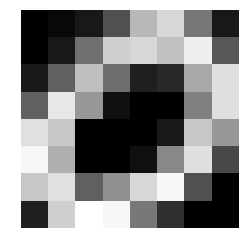

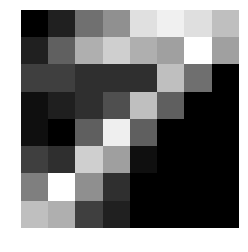

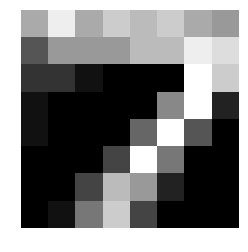

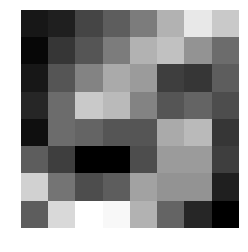

In [424]:
plot_k_distributions(P, 4)

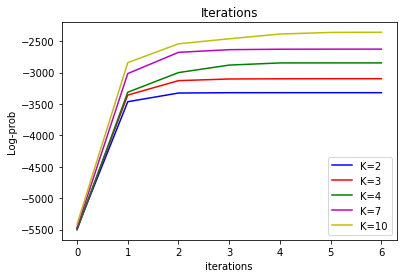

In [409]:
plt.plot(log_probs_2, 'b', label='K=2')
plt.plot(log_probs_3, 'r', label='K=3')
plt.plot(log_probs_4, 'g', label='K=4')
plt.plot(log_probs_7, 'm', label='K=7')
plt.plot(log_probs_10, 'y', label='K=10')
plt.ylabel('Log-prob')
plt.xlabel('iterations')
plt.title("Iterations")
plt.legend()
plt.show()

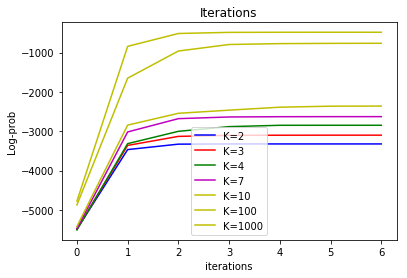

In [387]:
plt.plot(log_probs_2, 'b', label='K=2')
plt.plot(log_probs_3, 'r', label='K=3')
plt.plot(log_probs_4, 'g', label='K=4')
plt.plot(log_probs_7, 'm', label='K=7')
plt.plot(log_probs_10, 'y', label='K=10')
plt.plot(log_probs_100, 'y', label='K=100')
plt.plot(log_probs_1000, 'y', label='K=1000')
plt.ylabel('Log-prob')
plt.xlabel('iterations')
plt.title("Iterations")
plt.legend()
plt.show()

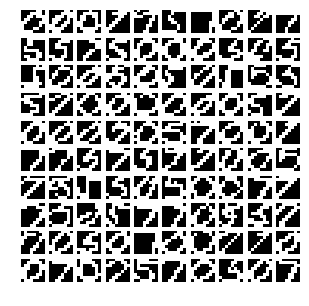

In [256]:
# this is how you display one image using matplotlib,
# e.g. the 4th image:

Y = np.loadtxt('binarydigits.txt')
N, D = Y.shape

plt.figure(figsize=(5, 5))
for n in range(N):
    plt.subplot(10, 10, n+1)
    plt.imshow(np.reshape(X[n, :], (8,8)),
            interpolation="None",
            cmap='gray')
    plt.axis('off')
       
plt.show()